In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import simweights
import pickle
import os, sys
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import pandas as pd
import tables
import h5py
import math
from scipy.stats import mstats
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from fonts import *



In [3]:
sys.path.append("/data/user/tvaneede/GlobalFit/EventGenerator/performance")
from weights import *
from utils import *
from files import files
from selections import create_selections

In [4]:
# version and plotting path
version = "v0"
files = files[version]


In [5]:
main_plotting_path = f"/data/user/tvaneede/GlobalFit/EventGenerator/performance/output/{version}"
os.system(f"mkdir -p {main_plotting_path}")

0

In [6]:
# open the files
for flavor in files:
    files[flavor]['hdf_file'] = pd.HDFStore(files[flavor]['file_path'],'r')
    files[flavor]['variables'] = get_variables( files[flavor]['hdf_file'] )
    files[flavor] = Append_Weights( files[flavor] )


In [7]:
keys_to_merge = {
    "NuE" : ["NuE_E2", "NuE_E3"],
    "NuMu" : ["NuMu_E2", "NuMu_E3"],
    "NuTau" : ["NuTau_E2", "NuTau_E3"],
    "NuAll" : ['NuE', "NuMu", "NuTau"],
}

for new_key in keys_to_merge:
    files[new_key] = {}
    files[new_key]['variables'] = {}

    for key in keys_to_merge[new_key]:
        for variable in files[key]['variables']:
            if variable not in files[new_key]['variables']:
                files[new_key]['variables'][variable] = []
            files[new_key]['variables'][variable].append( pd.Series(files[key]['variables'][variable]) )
    
    for variable in files[new_key]['variables']:
        files[new_key]['variables'][variable] = pd.concat(files[new_key]['variables'][variable])


In [8]:
from selections import create_selections

In [9]:
selections = create_selections( files["NuAll"] )

In [10]:
from fonts import *

TrueDoubleCascade


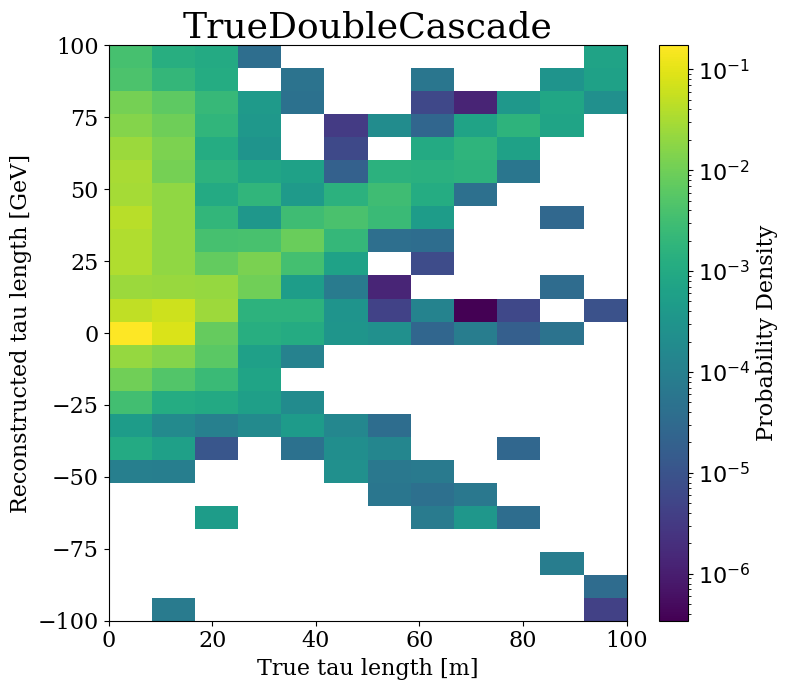

In [13]:
length_variable ="RecoL_evtgen_noabs"

plotting_path = f"{main_plotting_path}/{length_variable}-TrueL_negativebinning"
os.system(f"mkdir -p {plotting_path}")

selection_name = "TrueDoubleCascade"

print(selection_name)
selection = selections[selection_name]

fig, ax = plt.subplots(1, 1,figsize =(8,7))

x = files['NuAll']['variables']['TrueL'][ selection ]
y = files['NuAll']['variables'][length_variable][ selection ]
w = files['NuAll']['variables']['Weights_Astro'][selection]

clb = plot_2dHist(x=x,y=y,weights=w,
            xbins_start=0,xbins_stop=100,xbins=13,
            ybins_start=-100,ybins_stop=100,ybins=26,
            xlogspace=False,ylogspace=False,\
            title= selection_name,eventcount=False,ax=ax)

ax.set_xlabel("True tau length [m]",fontdict=font_axis_label)
ax.set_ylabel("Reconstructed tau length [GeV]",fontdict=font_axis_label)
clb.set_label('Probability Density', fontdict=font_axis_label)

plt.tight_layout()
plt.savefig(f"{plotting_path}/{length_variable}-TrueL_noabs_selection-{selection_name}.pdf")

